# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

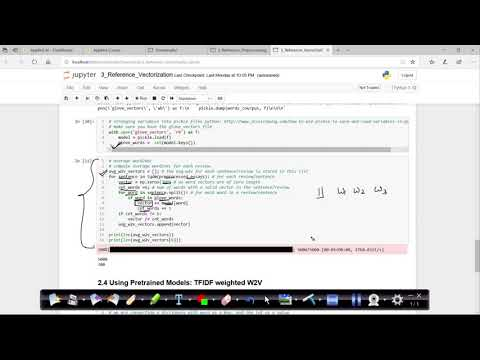

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

In [19]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [31]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

# <font color='red'> <b>Task - 1</b></font>

<h1>1. Decision Tree </h1>

In [11]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [12]:
data.head()

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03
2           ca  ...  329.00
3           ga  ...  481.04
4           wa  ...   17.74

[5 rows x 9 columns]

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [13]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

school_state  ...   price
0           ca  ...  725.05

[1 rows x 8 columns]

In [15]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [17]:
#ESSAY-TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 12132) (49041,)
(24155, 12132) (24155,)
(36052, 12132) (36052,)


In [34]:
#ESSAY-TFIDF-W2V
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [35]:
# average Word2Vec
# compute average word2vec for each review.
def tf_idf_done(word_list):
    train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(word_list): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split():#.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
              #vec = model.wv[word]  
              vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        train_title_tfidf_w2v_vectors.append(vector)
    print(len(train_title_tfidf_w2v_vectors))
    print(len(train_title_tfidf_w2v_vectors[0]))
    return train_title_tfidf_w2v_vectors

In [36]:
train_tfidf_w2v_vectors=tf_idf_done(X_train['essay'].values)
test_tfidf_w2v_vectors=tf_idf_done(X_test['essay'].values)
cv_tfidf_w2v_vectors=tf_idf_done(X_cv['essay'].values)

  0%|          | 106/36052 [00:00<01:11, 503.88it/s]

49041
300


  0%|          | 99/24155 [00:00<00:47, 508.44it/s]

36052
300


100%|██████████| 24155/24155 [00:47<00:00, 505.77it/s]

24155
300


In [20]:
#clean_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [21]:
#clean_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [22]:
#school_state (categorical)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [23]:
#teacher_prefix (categorical)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [24]:
#project_grade_category (categorical)
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [25]:
#price (numeric)

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [26]:
#teacher_number_of_previously_posted_projects (numeric)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [27]:
# sentiment of essay
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
X_train_essay_val = X_train['essay'].values
X_cv_essay_val = X_cv['essay'].values
X_test_essay_val = X_test['essay'].values

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
train_neg = []
train_neu = []
train_pos = []
train_compound = []
cv_neg = []
cv_neu = []
cv_pos = []
cv_compound = []
test_neg = []
test_neu = []
test_pos = []
test_compound = []
for i in X_train_essay_val:
  ss = sid.polarity_scores(i)
  train_neg.append(ss['neg'])
  train_neu.append(ss['neu'])
  train_pos.append(ss['pos'])
  train_compound.append(ss['compound'])

for i in X_cv_essay_val:
  ss = sid.polarity_scores(i)
  cv_neg.append(ss['neg'])
  cv_neu.append(ss['neu'])
  cv_pos.append(ss['pos'])
  cv_compound.append(ss['compound'])

for i in X_test_essay_val:
  ss = sid.polarity_scores(i)
  test_neg.append(ss['neg'])
  test_neu.append(ss['neu'])
  test_pos.append(ss['pos'])
  test_compound.append(ss['compound'])  



In [37]:
X_train['neg'] = train_neg
X_train['neu'] = train_neu
X_train['pos'] = train_pos
X_train['compound'] = train_compound

X_test['neg'] = test_neg
X_test['neu'] = test_neu
X_test['pos'] = test_pos
X_test['compound'] = test_compound

X_cv['neg'] = cv_neg
X_cv['neu'] = cv_neu
X_cv['pos'] = cv_pos
X_cv['compound'] = cv_compound


In [39]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_neg = normalizer.transform(X_train['neg'].values.reshape(-1,1))
X_cv_neg = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
X_test_neg = normalizer.transform(X_test['neg'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neg.shape, y_train.shape)
print(X_cv_neg.shape, y_cv.shape)
print(X_test_neg.shape, y_test.shape)
print("="*100)




After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [40]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neu'].values.reshape(-1,1))

X_train_neu = normalizer.transform(X_train['neu'].values.reshape(-1,1))
X_cv_neu = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
X_test_neu = normalizer.transform(X_test['neu'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neu.shape, y_train.shape)
print(X_cv_neu.shape, y_cv.shape)
print(X_test_neu.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [41]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['pos'].values.reshape(-1,1))

X_train_pos = normalizer.transform(X_train['pos'].values.reshape(-1,1))
X_cv_pos = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
X_test_pos = normalizer.transform(X_test['pos'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_pos.shape, y_train.shape)
print(X_cv_pos.shape, y_cv.shape)
print(X_test_pos.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [42]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_compound = normalizer.transform(X_train['compound'].values.reshape(-1,1))
X_cv_compound = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
X_test_compound = normalizer.transform(X_test['compound'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_compound.shape, y_train.shape)
print(X_cv_compound.shape, y_cv.shape)
print(X_test_compound.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [ ]:
#MERGING

In [43]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_set1_train = hstack((X_train_essay_tfidf,
                       X_train_clean_categories_ohe,
                       X_train_clean_subcategories_ohe,
                       X_train_state_ohe,
                       X_train_teacher_ohe,
                       X_train_grade_ohe,
                       X_train_price_norm,
                       X_train_teacher_number_of_previously_posted_projects_norm,
                       X_train_neg,X_train_neu,X_train_pos,X_train_compound)).tocsr()
print(X_set1_train.shape, y_train.shape)

(49041, 12237) (49041,)


In [44]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_set1_cv = hstack((X_cv_essay_tfidf,
                    X_cv_clean_categories_ohe,
                    X_cv_clean_subcategories_ohe,
                    X_cv_state_ohe,
                    X_cv_teacher_ohe,
                    X_cv_grade_ohe,
                    X_cv_price_norm,
                    X_cv_teacher_number_of_previously_posted_projects_norm,
                    X_cv_neg,X_cv_neu,X_cv_pos,X_cv_compound)).tocsr()
print(X_set1_cv.shape, y_cv.shape)

(24155, 12237) (24155,)


In [45]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx 
X_set1_test = hstack((X_test_essay_tfidf,
                      X_test_clean_categories_ohe,
                      X_test_clean_subcategories_ohe,
                      X_test_state_ohe,
                      X_test_teacher_ohe,
                      X_test_grade_ohe,
                      X_test_price_norm,
                      X_test_teacher_number_of_previously_posted_projects_norm,
                      X_test_neg,X_test_neu,X_test_pos,X_test_compound)).tocsr()
print(X_set1_test.shape, y_test.shape)

(36052, 12237) (36052,)


In [46]:
X_set2_train = hstack((train_tfidf_w2v_vectors,
                       X_train_clean_categories_ohe,
                       X_train_clean_subcategories_ohe,
                       X_train_state_ohe,
                       X_train_teacher_ohe,
                       X_train_grade_ohe,
                       X_train_price_norm,
                       X_train_teacher_number_of_previously_posted_projects_norm,
                       X_train_neg,X_train_neu,X_train_pos,X_train_compound)).tocsr()
print(X_set2_train.shape, y_train.shape)

(49041, 405) (49041,)


In [47]:
X_set2_cv = hstack((cv_tfidf_w2v_vectors,
                    X_cv_clean_categories_ohe,
                    X_cv_clean_subcategories_ohe,
                    X_cv_state_ohe,
                    X_cv_teacher_ohe,
                    X_cv_grade_ohe,
                    X_cv_price_norm,
                    X_cv_teacher_number_of_previously_posted_projects_norm,
                    X_cv_neg,X_cv_neu,X_cv_pos,X_cv_compound)).tocsr()
print(X_set2_cv.shape, y_cv.shape)

(24155, 405) (24155,)


In [48]:
X_set2_test = hstack((test_tfidf_w2v_vectors,
                      X_test_clean_categories_ohe,
                      X_test_clean_subcategories_ohe,
                      X_test_state_ohe,
                      X_test_teacher_ohe,
                      X_test_grade_ohe,
                      X_test_price_norm,
                      X_test_teacher_number_of_previously_posted_projects_norm,
                      X_test_neg,X_test_neu,X_test_pos,X_test_compound)).tocsr()
print(X_set2_test.shape, y_test.shape)

(36052, 405) (36052,)


In [ ]:
#reference: https://github.com/shashimanyam/DECISION-TREE-ON-DONORSCHOOSE-DATASET/blob/master/DECISION%20TREE%20ON%20DONORSCHOOSE.ipynb

In [ ]:
#Applying Decision trees on set 1

In [49]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf1 = GridSearchCV(dt1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se1 = clf1.fit(X_set1_train, y_train)

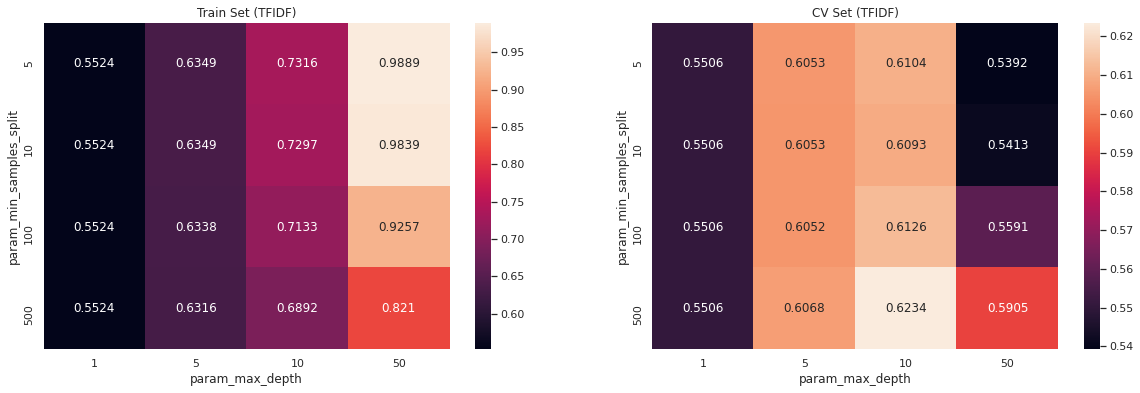

In [51]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set (TFIDF)')
ax[1].set_title('CV Set (TFIDF)')
plt.show()

In [52]:
print(clf1.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf1.score(X_set1_train,y_train))
print(clf1.score(X_set1_test,y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6889510453236725
0.6217401889416891


In [54]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[10], 'min_samples_split':[500] } ]

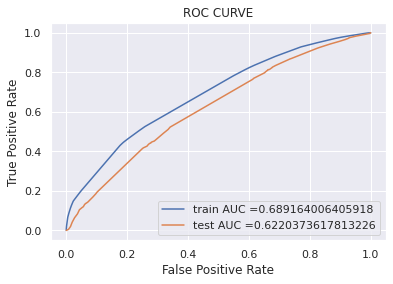

In [55]:
#BEST MODEL --> DEPTH:10, MIN SAMPLES=500

from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf11.fit(X_set1_train, y_train)
# for visulation
clfV1.fit(X_set1_train, y_train)
y_train_pred1 = clf11.predict_proba(X_set1_train) [:,1]
y_test_pred1 = clf11.predict_proba(X_set1_test) [:,1]
train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid(True)
plt.show()

In [58]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    #print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

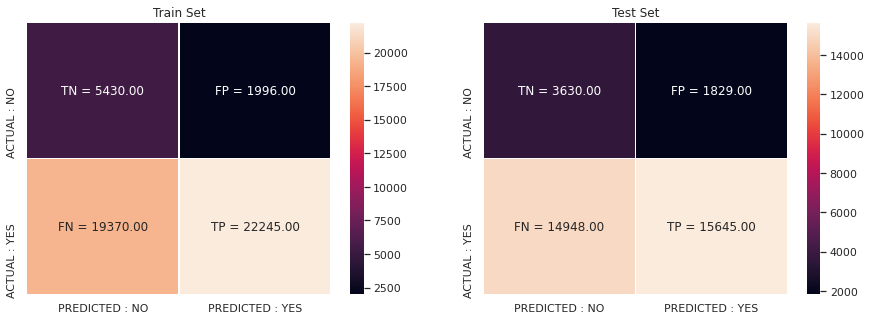

In [59]:
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [61]:
# OBTAINING ALL FALSE POSITIVE POINTS
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])

In [62]:
len(fp_essay1)

1829

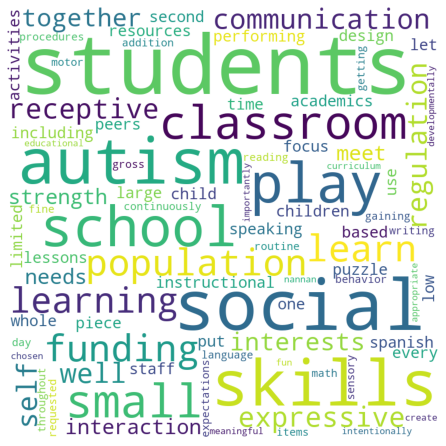

In [64]:
#WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

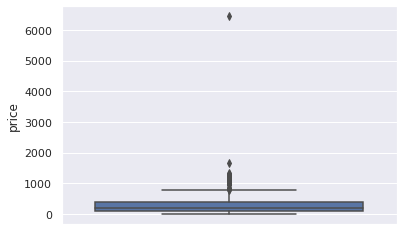

In [65]:
#BOX PLOT

# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)
sns.boxplot(y='price', data=X_test_falsePos1)

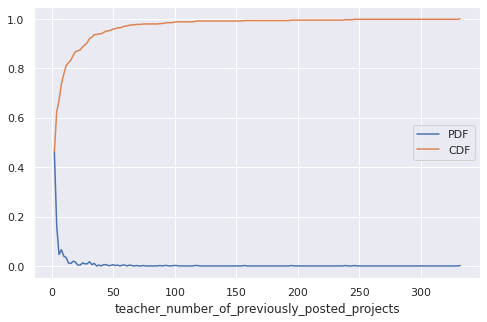

In [66]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()


FOR SET 2 (TFIDF-W2V):

In [67]:
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se2 = clf2.fit(X_set2_train, y_train)

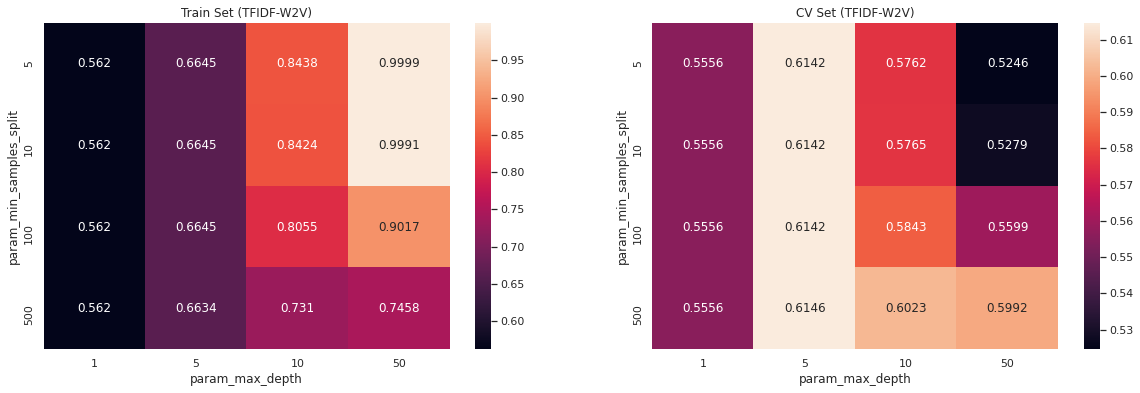

In [68]:
import seaborn as sns; sns.set()
max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set (TFIDF-W2V)')
ax[1].set_title('CV Set (TFIDF-W2V)')
plt.show()

In [69]:
print(clf2.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf2.score(X_set2_train,y_train))
print(clf2.score(X_set2_test,y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6545337522055493
0.615292259847476


In [70]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[5], 'min_samples_split':[500] } ]

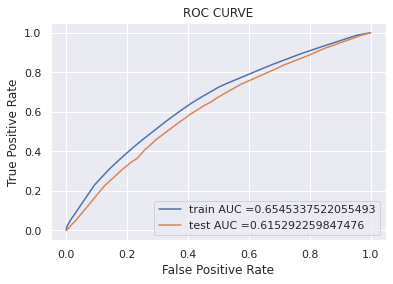

In [71]:
#BEST MODEL --> DEPTH:5, MIN SAMPLES=500

from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf12= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV2=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf12.fit(X_set2_train, y_train)
# for visulation
clfV1.fit(X_set2_train, y_train)
y_train_pred2 = clf12.predict_proba(X_set2_train) [:,1]
y_test_pred2 = clf12.predict_proba(X_set2_test) [:,1]
train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)
plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.grid(True)
plt.show()

In [72]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    #print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions2 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions2= predictions
    return predictions

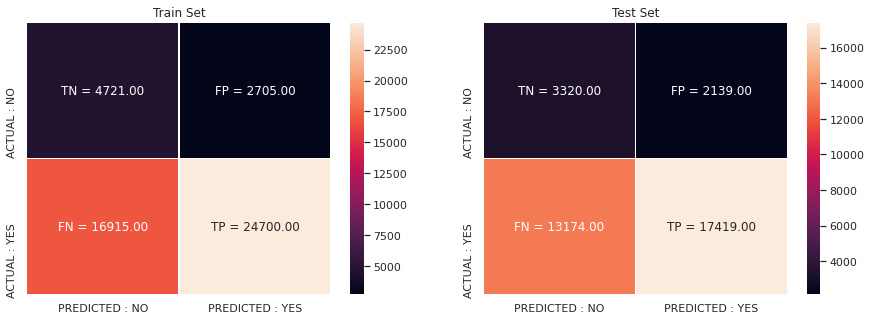

In [73]:
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred2, tr_thresholds2, train_fpr2, train_tpr2))
con_m_test = confusion_matrix(y_test, predict(y_test_pred2, te_thresholds2, test_fpr2, test_tpr2))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [74]:
# OBTAINING ALL FALSE POSITIVE POINTS
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions2[i] == 1) :
    fpi.append(i)
fp_essay2 = []
for i in fpi :
  fp_essay2.append(X_test['essay'].values[i])

In [75]:
len(fp_essay2)

2139

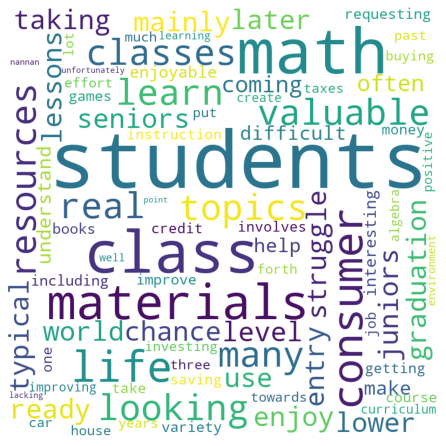

In [76]:
#WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay2 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

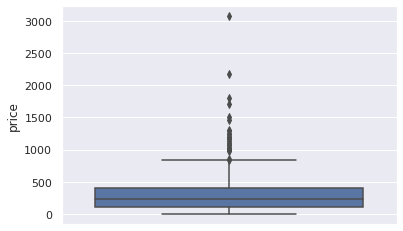

In [77]:
#BOX PLOT

# first get the columns:
cols = X_test.columns
X_test_falsePos2 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
  X_test_falsePos2 = X_test_falsePos2.append(X_test.filter(items=[i], axis=0))

X_test_falsePos2.head(1)
len(X_test_falsePos2)
sns.boxplot(y='price', data=X_test_falsePos2)

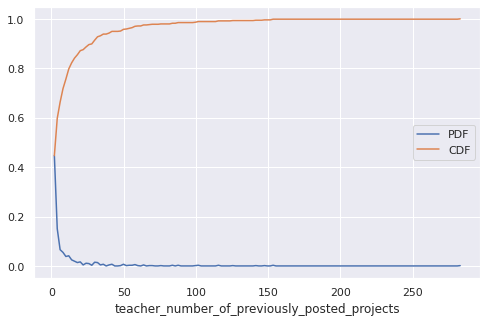

In [79]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos2['teacher_number_of_previously_posted_projects'],
bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [82]:
feature_importance_vals = clfV1.feature_importances_

In [84]:
np.count_nonzero(feature_importance_vals, axis = 0)

108

In [86]:
def selectKImportance(model, X, k):
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [91]:
X_train_bestfeat = selectKImportance(clf1, X_set1_train,108)
X_test_bestfeat = selectKImportance(clf1, X_set1_test, 108)

In [97]:
print(X_train_bestfeat.shape)
print(X_test_bestfeat.shape)

(49041, 108)
(36052, 108)


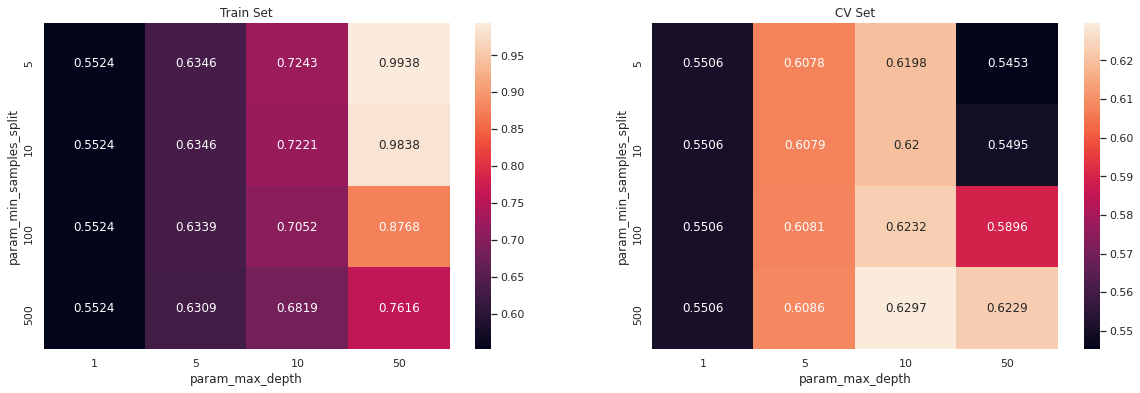

In [92]:
dt3= DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf3 = GridSearchCV(dt3, parameters, cv=3, scoring='roc_auc',return_train_score=True)
set3= clf3.fit(X_train_bestfeat, y_train)


import seaborn as sns; sns.set()
max_scores3 = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores3.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores3.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [94]:
#Best Estimator and Best tune parameters
print(clf3.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf3.score(X_train_bestfeat,y_train))
print(clf3.score(X_test_bestfeat,y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6889510453236725
0.6217401889416891


In [98]:
best_tune_parameters=[{'max_depth': [10], 'min_samples_split':[500] } ]

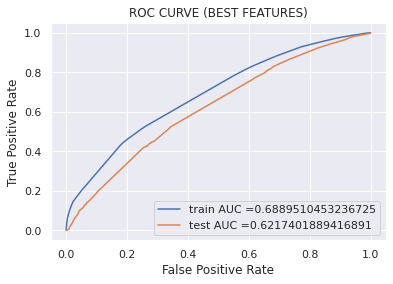

In [99]:
#BEST MODEL --> DEPTH:10, MIN SAMPLES=500

from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf13= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV3=DecisionTreeClassifier (class_weight = 'balanced',max_depth=10,min_samples_split=500)
clf13.fit(X_train_bestfeat, y_train)
# for visualisation
clfV3.fit(X_train_bestfeat, y_train)
y_train_pred3 = clf13.predict_proba(X_train_bestfeat) [:,1]
y_test_pred3 = clf13.predict_proba(X_test_bestfeat) [:,1]
train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)
plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE (BEST FEATURES)")
plt.grid(True)
plt.show()

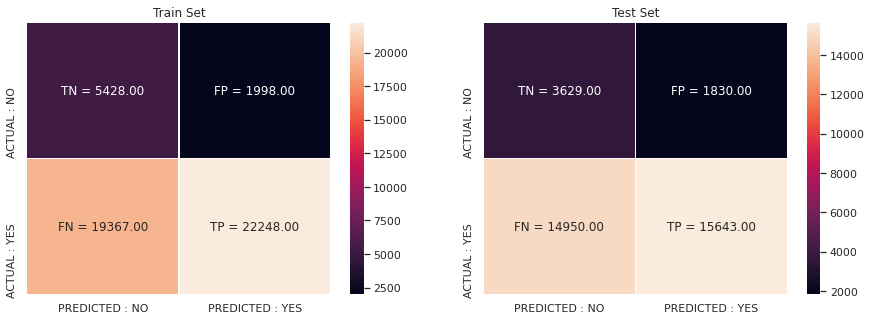

In [102]:
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(y_train, predict(y_train_pred3, tr_thresholds3, train_fpr3, train_tpr3))
con_m_test = confusion_matrix(y_test, predict(y_test_pred3, te_thresholds3, test_fpr3, test_tpr3))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [101]:
# Please compare all your models using Prettytable library
#how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split "," Test -AUC ")
tb.add_row([" Tf - Idf", 10 , 500 ,str(auc(test_fpr1, test_tpr1)) ])
tb.add_row(["TF-IDF W2V", 5 , 500 , str(auc(test_fpr2, test_tpr2))])
tb.add_row(["Non zero impportant Features", 10, 500 ,str(auc(test_fpr3, test_tpr3)) ])
print(tb.get_string(titles = "Decision trees- Observations"))

+------------------------------+-------------+--------------------+--------------------+
|          Vectorizer          |  Max_depth  |  Min_sample_split  |     Test -AUC      |
+------------------------------+-------------+--------------------+--------------------+
|           Tf - Idf           |      10     |        500         | 0.6220373617813226 |
|          TF-IDF W2V          |      5      |        500         | 0.615292259847476  |
| Non zero impportant Features |      10     |        500         | 0.6217401889416891 |
+------------------------------+-------------+--------------------+--------------------+
